 - Contenido Creative Commons Attribution license, CC-BY 
 - Código con licencia MIT
 
![creative commons attribution](./images/CC-BY.png)

 - (c) Kyle T. Mandli
 - (c) Modificado por Pablo Angulo y Fabricio Macià para ETSIN@UPM

In [2]:
%matplotlib inline
import numpy
import numpy as np
import matplotlib.pyplot as plt

# Método numérico

Un método numérico es un procedimiento para aproximar la solución de un problema matemático:
  - No todos los problemas admiten soluciones exactas.
  - El cálculo simbólico tampoco puede resolver todos los problemas.
  - Incluso aunque la solución exista, puede ser demasiado costoso encontrar esa solución.
  - Muchos métodos de cálculo exacto o simbólico no tienen garantías de terminar en tiempo razonable.

En general, un método numérico debe ser capaz de aproximar la solución al problema matemático con tanta precisión como queramos.
En la práctica, tanta precisión es innecesaria, y muy costosa.
Todos los métodos numéricos deben aproximar la solución buscando un equilibrio entre:
  - poco error
  - poco tiempo de cómputo

# Tipos de error

- Errores en los datos: **error de medición**, __ruido__.
- Errores al simplificar la realidad mediante un modelo matemático: **error de modelo**.
- Errores al reemplazar el objeto matemático de interés (número, vector, función, etc) por otro objeto matemático más fácil de calcular: **error de truncamiento**.
- Errores al representar números reales con una cantidad finita de cifras decimales, y al hacer operaciones con números de coma flotante en vez de con números reales: **error de redondeo**.

En esta asignatura, hablaremos únicamente de los dos últimos tipos de error, pero es importante recordar que hay muchas fuentes de error:
  - No tiene sentido buscar una solución del problema matemático con precisión mayor que la permiten los errores de medición o de modelo.
  - Es interesante diseñar métodos robustos a errores.
  
*Salvo en ejemplos de laboratorio, nunca podremos conocer exactamente el error, pero a veces podremos acotarlo.*

## Error de modelo

A menudo son simplificaciones conscientes, cuyo efecto en la solución se puede estimar
 - Ignoramos fuerzas que sabemos que actúan pero pensamos que tienen poca magnitud
 - Aproximamos el número de barcos por un número real
 - Simplificamos la geometría del buque
 - Asumimos que no hay mezcla entre capas de fluído
 - un largo etcétera

Pero también a veces el error de modelo es muy difícil de estimar
 - Efecto del metano en modelos climáticos
 - Burbujas y crisis son influenciados por percepciones humanas
 - otro largo etcétera

## Error de truncamiento

Errores al sustituir un objeto matemático por otro más sencillo:
 - aproxima una función por otra: $sin(x) \approx x$ for $|x| \approx 0$.
 - aproxima un número por otro: $x$, solución de $10x + \sin(x)=1$ se puede aproximar por la solución de $10x=1$
 - veremos otros muchos ejemplos

## Error absoluto y relativo

Si $x$ es el número que buscamos, $y$ es la aproximación:
- Error absoluto:
$$ e = |x-y|$$
- Error relativo:
$$
    r = \frac{e}{|x|} = \frac{|x - y|}{|x|}
$$
También se usa a menudo el error cuadrático, o error al cuadrado:
$$ e = (x-y)^2$$
aunque a priori es una deformación del error real, y no tiene las unidades correctas, a menudo es más fácil de trabajar con este tipo de error.


**Atención** a las unidades de cada tipo de error.

## La notación O-grande

En muchas situaciones, una aproximación tendrá un parámetro asociado a alla. Normalmente, el valor del parámetro se elige de forma que el error tiene un tamaño razonable en el contexto que estemos manejando. En tal caso, nos interesará conocer el impacto que el hacer variar el valor del parámetro tiene sobre el error. Esta es la motivación de la notación O-grande:

$$    f(x) =  O(g(x)) \quad \text{cuando} \quad x \rightarrow a   $$ 

si y sólo si

$$    |f(x)| \leq M |g(x)| \quad \text{cuando}\quad  |x - a| < \delta \quad \text{donde} \quad M,a > 0. $$ 

En la práctica, utilizaremos la notación O-grande para cuantificar el efecto que tiene aproximar una serie de potencias descartando todos los términos a partir de uno dado.

## Error de truncamiento en el Teorema de Taylor

**Teorema de Taylor:**  Sea $f(x) \in C^{m+1}[a,b]$, $x_0 \in [a,b]$.

Para cualquier $x \in (a,b)$ existe un número $c = c(x)$ en el intervalo entre $x_0$ y $x$ tal que

$$ f(x) = T_N(x) + R_N(x)$$

donde $T_N(x)$ es el polinomio de Taylor de $f$ de grado $N$ en $x0$:

$$T_N(x) = \sum^N_{n=0} \frac{f^{(n)}(x_0)\cdot(x-x_0)^n}{n!}$$

y $R_N(x)$ es el error de Taylor

$$R_N(x) = \frac{f^{(n+1)}(c) \cdot (x - x_0)^{n+1}}{(n+1)!}$$

Es un error de truncamiento, independiente de cuántos dígitos de precisión usemos para representar los números reales.

El error de truncamiento se puede acotar si podemos acotar la derivada $f^{(n+1)}(c)$ por una constante $M$:

$$
    R_N(x) = \frac{f^{(n+1)}(c) \cdot (x-x_0)^{n+1}}{(n+1)!} \leq \frac{M (x-x_0)^{n+1}}{(n+1)!}
$$

#### Ejemplo

$f(x) = e^x$, $x_0 = 0$

Podemos acotar el error que comete la aproximación $T_2$, en función de $x$.

Derivadas:
$$\begin{aligned}
    f'(x) &= e^x \\
    f''(x) &= e^x \\ 
    f^{(n)}(x) &= e^x
\end{aligned}$$

Polinomios de Taylor:
$$\begin{aligned}
    T_N(x) &= \sum^N_{n=0} e^0 \frac{x^n}{n!} \Rightarrow \\
    T_2(x) &= 1 + x + \frac{x^2}{2}
\end{aligned}$$

Restos (usando $e<3$):
$$\begin{aligned}
    R_N(x) &= e^c \frac{x^{n+1}}{(n+1)!}\Rightarrow \\
    R_2(x) &= e^c \cdot \frac{x^3}{6} \leq \frac{e^x}{6}
\end{aligned}$$

Es decir, aproximamos 
$e^1 = 2.718$ por $T_2(1) = 2.5$, y sabemos que comete un error menor que $\frac{e^1}{6}<0.5$.
En realidad, el error es menor.

Usamos sympy para calcular polinomios de Taylor simbólicamente

In [3]:
import sympy
x = sympy.symbols('x')
f = sympy.symbols('f', cls=sympy.Function)

f = sympy.exp(x)
f.series(x0=0, n=6)

1 + x + x**2/2 + x**3/6 + x**4/24 + x**5/120 + O(x**6)

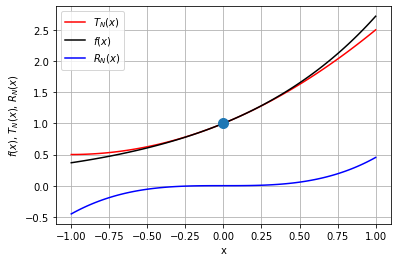

In [4]:
x = numpy.linspace(-1, 1, 100)
T_N = 1.0 + x + x**2 / 2.0
R_N = numpy.exp(1) * x**3 / 6.0

plt.plot(x, T_N, 'r', x, numpy.exp(x), 'k', x, R_N, 'b')
plt.plot(0.0, 1.0, 'o', markersize=10)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("$f(x)$, $T_N(x)$, $R_N(x)$")
plt.legend(["$T_N(x)$", "$f(x)$", "$R_N(x)$"], loc=2)
plt.show()

**Cómo se comporta la notación O-grande. Propiedades:**

Hay dos resultados que nos permiten entender como se comporta una O-grande de x cuendo el valor de la variable x **es muy grande**: 

Sea
$$\begin{aligned}
    f(x) &= p(x) + O(x^n) \\
    g(x) &= q(x) + O(x^m) \\
    k &= \max(n, m)
\end{aligned}$$
entonces
$$
    f+g = p + q + O(x^k)
$$
y
\begin{align}
    f \cdot g &= p \cdot q + p O(x^m) + q O(x^n) + O(x^{n + m}) \\
    &= p \cdot q + O(x^{n+m})
\end{align}

Por el contrario, si lo que nos interesa son los **valores pequeños** de x, pongamos que se trata de un incremento $\Delta x$ pequeño, las fórmulas correspondientes son: 

\begin{align}
    f(\Delta x) &= p(\Delta x) + O(\Delta x^n) \\
    g(\Delta x) &= q(\Delta x) + O(\Delta x^m) \\
    r &= \min(n, m)
\end{align}
entonces
$$
    f+g = p + q + O(\Delta x^r)
$$
and
\begin{align}
    f \cdot g &= p \cdot q + p \cdot O(\Delta x^m) + q \cdot O(\Delta x^n) + O(\Delta x^{n+m}) \\
    &= p \cdot q + O(\Delta x^r)
\end{align}

### Contar operaciones

 - Como hemos dicho, al elegir un método numérico hay que estudiar el error que comete y el tiempo de cómputo que necesita.

Para estimar el tiempo de cómputo, es habitual contar el número de operaciones necesarias. La relación con el tiempo de cómputo no es lineal, ya que a menudo otros factores afectan al tiempo de cómputo de formas difíciles de prever:
 - la cantidad de memoria de cada tipo (cache o RAM)
 - el número de procesadores
 - las instrucciones específicas de algunos procesadores para cálculo numérico
 - las optimizaciones que hacen algunos compiladores cuando detectan ciertos patrones
 - un largo etcétera

En todo caso, sigue siendo útil contar el número de operaciones.

### Números de coma flotante

Un sistema de números de coma flotante, representa algunos números reales en la forma siguiente:

$$F = \pm d_1 . d_2 d_3 d_4 \ldots d_p \times \beta^E$$

donde
1. $\pm$ es un bit que representa el signo del número
2. $d_1 . d_2 d_3 d_4 \ldots d_p$ se denomina la *mantisa*. El punto decimal siempre está detrás del primer dígito. Se asume que $d_1 \neq 0$ a menos que el número esa exactamente $0$.
3. $\beta$ es la *base*. Puede ser base $\beta = 2$ para el sistema binario, o $\beta = 10$ para el decimal
4. $E$ es el *exponente*, un número entero.

#### Características importantes

1. La cantidad de números representables es finita
2. Estos números no están distribuidos de forma uniforme
3. _La aritmética_ con números de coma flotante _no es exacta_, porque el resultado de una operación con dos números representables podría no ser representable (en es caso, se busca el número representable más cercano).

El **desbordamiento** ocurre cuando el resultado de una operación es:
 - __overflow__: mayor que el número más grande representable en el sistema
 - __underflow__: menor que el número _positivo_ más pequeño representable en el sistema
Un overflow da lugar a un número especial del sistema: $\inf$ ó $-\inf$. Las operaciones continúan, y por ejemplo $1/\inf=0$, pero si se pide una indeterminación, el resultado es otro "número" especial del sistema: `undefined`.


### Real Systems - IEEE 754 Binary Floating Point Systems

#### Single Precision
 - Total storage alloted is 32 bits
 - Exponent is 8 bits $\Rightarrow E \in [-126, 127]$
 - Fraction 23 bits ($p = 24$)
 
```
s EEEEEEEE FFFFFFFFFFFFFFFFFFFFFFF
0 1      8 9                     31
```
Overflow $= 2^{127} \approx 3.4 \times 10^{38}$

Underflow $= 2^{-126} \approx 1.2 \times 10^{-38}$

$\epsilon_{\text{machine}} = 2^{-23} \approx 1.2 \times 10^{-7}$

#### Double Precision
 - Total storage alloted is 64 bits
 - Exponent is 11 bits $\Rightarrow E \in [-1022, 1024]$
 - Fraction 52 bits ($p = 53$)
 
```
s EEEEEEEEEE FFFFFFFFFF FFFFFFFFFF FFFFFFFFFF FFFFFFFFFF FFFFFFFFFF FF
0 1       11 12                                                      63
```
Overflow $= 2^{1024} \approx 1.8 \times 10^{308}$

Underflow $= 2^{-1022} \approx 2.2 \times 10^{-308}$

$\epsilon_{\text{machine}} = 2^{-52} \approx 2.2 \times 10^{-16}$

Cuando queramos distinguir las operaciones con números reales de las operaciones en el sistema de coma flotante, usaremos $\ominus$ para la resta, $ \oplus$ para la suma, etc.

Se pueden definir de esta forma:
 - $fl(x)$ es el número de coma flotante más próximo a $x$ (hay varias formas de redondear, pero no las vamos a discutir).
 - $x\oplus y = fl(x + y)$
 - $x\otimes y = fl(x \times y)$
 - etcétera...

Si los operandos $x$ e $y$ no son representables en el sistema, hay que definir:
 - $x\oplus y = fl(fl(x) + fl(y))$
 - $x\otimes y = fl(fl(x) \times fl(y))$
 - etcétera... 

### Ejemplo 1:
 
Elegimos un $\delta$ más pequeño que el $ \epsilon_{\text{machine}}$ (el número positivo más pequeño del sistema):

   $$1\oplus \delta \ominus 1 = (1\oplus \delta) \ominus 1 = 0$$

   $$1 \ominus 1 \oplus \delta = (1 \ominus 1) \oplus \delta = \delta$$

In [7]:
epsilon = np.finfo(float).eps

In [11]:
epsilon/200000

1.1102230246251566e-21

In [13]:
print(epsilon)
print(1 + epsilon - 1 )
print(1 - 1  + epsilon)
print('Ahora con un número menor que el epsilon de la máquina')
print(epsilon/2)
print(1 + epsilon/2 - 1 )
print(1 - 1  + epsilon/2)

2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
Ahora con un número menor que el epsilon de la máquina
1.1102230246251565e-16
0.0
1.1102230246251565e-16


### Cancelación

Si el ejemplo anterior era _"inofensivo"_, observa qué ocurre **cuando restamos números	que son casi iguales**.

Supóngase $x$ e $y$ dos números casi iguales con $x>y$, con sus representaciones en coma flotante de $k$ dígitos
$$
\begin{align}
fl(x)=0.d_1d_2\ldots d_p\alpha_{p+1}\alpha_{p+2}\ldots \alpha_{k}\times10^n \nonumber \\
fl(y)=0.d_1d_2\ldots d_p\beta_{p+1}\beta_{p+2}\ldots \beta_{k}\times10^n \nonumber
\end{align}
$$
Al restarlos $x\ominus y$:
$$
fl(fl(x)-fl(y))=0.\sigma_{p+1}\sigma_{p+2}\ldots\sigma_{k}\times10^{n-p}
$$
con
$$
0.\sigma_{p+1}\sigma_{p+2}\ldots\sigma_{k}=0.\alpha_{p+1}\alpha_{p+2}\ldots\alpha_{k}-0.\beta_{p+1}\beta_{p+2}\ldots\beta_{k}
$$
La resta sólo tiene $k-p$ dígitos de precisión, aunque los operandos tenían $k$ dígitos de precisión.

### Ejemplo: Función racional

Calculamos $f(x) = x + 1$ mediante $$F(x) = \frac{x^2 - 1}{x - 1}$$, y dibujamos el error $|f-F|$.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


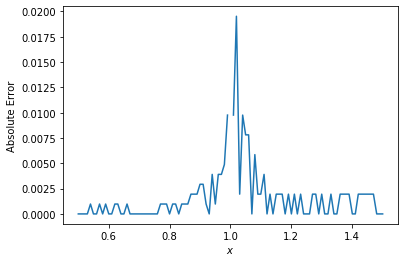

In [14]:
x = numpy.linspace(0.5, 1.5, 101, dtype=numpy.float16)
f = x + 1.0
F = (x**2 - 1.0) / (x - 1.0)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, numpy.abs(F -f))
axes.set_xlabel("$x$")
axes.set_ylabel("Absolute Error")
plt.show()

### Ejemplo 3: Evaluar una función

Considera la función
$$
    f(x) = \frac{1 - \cos x}{x^2}
$$
con $x\in[-10^{-4}, 10^{-4}]$ ($x$ cercano a $0$).

Al tomar el límite $x \rightarrow 0$ esperamos encontrar el límite:
$$
    \lim_{x \rightarrow 0} \frac{1 - \cos x}{x^2} = \lim_{x \rightarrow 0} \frac{\sin x}{2 x} = \lim_{x \rightarrow 0} \frac{\cos x}{2} = \frac{1}{2}.
$$

¿Pero qué ocurre al hacer el cálculo en coma flotante, con 32 bits de precisión?

Text(0, 0.5, 'Relative Error')

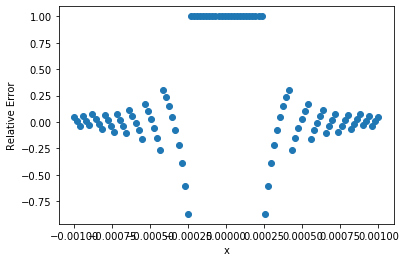

In [15]:
x = numpy.linspace(-1e-3, 1e-3, 100, dtype=numpy.float32)
#x = numpy.linspace(-1e-3, 1e-3, 100, dtype=numpy.float64)
error = (0.5 - (1.0 - numpy.cos(x)) / x**2) / 0.5

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, error, 'o')
axes.set_xlabel("x")
axes.set_ylabel("Relative Error")

### Ejemplo 4: Evaluar un polinomio

Veremos que varias técnicas numéricas con mucha tradición se basan en polinomios de grado alto.

Pero evaluar un polinomio de grado alto introduce errores numéricos:

   $$f(x) = x^7 - 7x^6 + 21 x^5 - 35 x^4 + 35x^3-21x^2 + 7x - 1$$

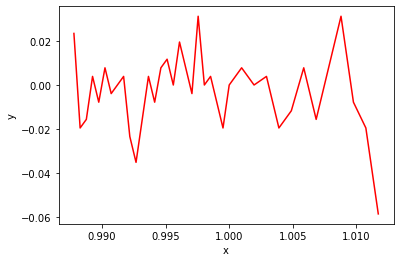

In [16]:
#Usando 32 bits de precisión
x = numpy.linspace(0.988, 1.012, 1000, dtype=numpy.float16)
y = x**7 - 7.0 * x**6 + 21.0 * x**5 - 35.0 * x**4 + 35.0 * x**3 - 21.0 * x**2 + 7.0 * x - 1.0

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, y, 'r')
axes.set_xlabel("x")
axes.set_ylabel("y")
plt.show()

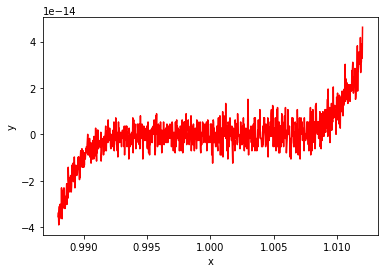

In [17]:
#Usando 64 bits de precisión
x = numpy.linspace(0.988, 1.012, 1000)
y = x**7 - 7.0 * x**6 + 21.0 * x**5 - 35.0 * x**4 + 35.0 * x**3 - 21.0 * x**2 + 7.0 * x - 1.0

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, y, 'r')
axes.set_xlabel("x")
axes.set_ylabel("y")
plt.show()

En este caso, el ruido numérico disminuye si evaluamos el polinomio de otra forma.

Esta _evaluación anidada_ requiere algunas operaciones menos y acumula menos error que la evaluación naive de un polinomio.

El _orden al hacer las operaciones_ importa.

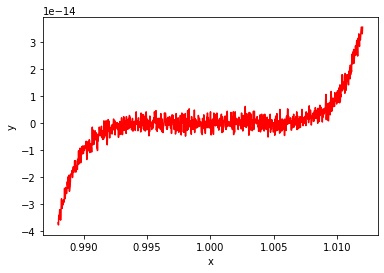

In [18]:
x = numpy.linspace(0.988, 1.012, 1000)
y = ((((((x - 7.0)*x + 21.0)*x - 35.0)*x + 35.0)*x - 21.0)*x + 7.0) * x - 1.0

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, y, 'r')
axes.set_xlabel("x")
axes.set_ylabel("y")
plt.show()

## Combinación de los dos tipos de error

En general tendremos que lidiar con los dos tipos de error a la vez. Con suerte, un error predomina, lo que simplifica el análisis, pero en general, los errores se propagan, se acumulan y a veces se amplifican.

### Ejemplo

Aproximamos la derivada de $f(x) = e^x$ en $x=1$ por la diferencia:

$$f'(x) \approx \frac{f(x + \Delta x) - f(x)}{\Delta x}$$

Comparamos el error cuando $\Delta x$ decrece, entre la aproximación y la respuesta correcta $f'(1) = e$.

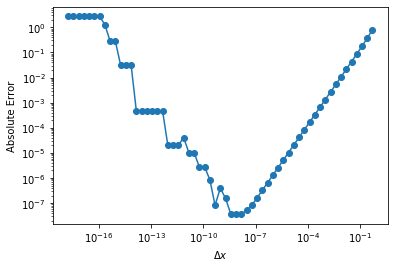

In [19]:
delta_x = numpy.array([2.0**(-n) for n in range(1, 60)])
x = 1.0
f_hat = (numpy.exp(x + delta_x) - numpy.exp(x)) / (delta_x)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.loglog(delta_x, numpy.abs(f_hat - numpy.exp(1)), 'o-')
axes.set_xlabel("$\Delta x$")
axes.set_ylabel("Absolute Error")
plt.show()